## Significance Tests with Python - 4-6 

In [3]:
from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

# try:
#     import common
#     DATA = common.dataDirectory()
# except ImportError:
#     DATA = Path().resolve() / 'data'

# #


      Page  Time
0   Page A  0.21
1   Page B  2.53
2   Page A  0.35
3   Page B  0.71
4   Page A  0.67
5   Page B  0.85
6   Page A  2.11
7   Page B  2.46
8   Page A  1.32
9   Page B  1.49
10  Page A  0.68
11  Page B  0.75
12  Page A  3.21
13  Page B  3.33
14  Page A  1.47
15  Page B  1.87
16  Page A  0.95
17  Page B  1.26
18  Page A  0.45
19  Page B  0.48
20  Page A  1.18
21  Page B  1.47
22  Page A  3.42
23  Page B  3.57
24  Page A  1.97
25  Page B  2.23
26  Page A  0.39
27  Page B  0.43
28  Page A  0.65
29  Page B  0.87
30  Page A  1.73
31  Page A  0.74
32  Page A  0.86
33  Page A  1.18
34  Page A  2.06
35  Page A  0.93


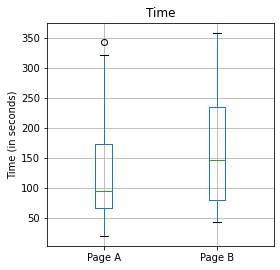

35.66666666666667


In [7]:
 # Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

WEB_PAGE_DATA_CSV = 'web_page_data.csv'
# FOUR_SESSIONS_CSV = DATA / 'four_sessions.csv'
# CLICK_RATE_CSV = DATA / 'click_rates.csv'
# IMANISHI_CSV = DATA / 'imanishi_data.csv'

## Resampling

session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)



21 15
35.09523809523809


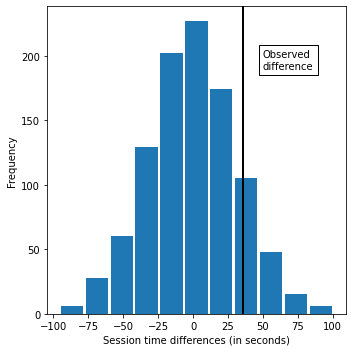

0.121


In [8]:
# The following code is different to the R version. idx_A and idx_B are reversed.

# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

# get n for each sample 
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(nA, nB)
print(perm_fun(session_times.Time, nA, nB))

random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(np.mean(perm_diffs > mean_b - mean_a))